# Automated least-squares calibration: Using ```optim()```, R's built-in optimisation function

## Introduction

If you've completed the previous etivity, you should now have a working function which takes in data and parameters for an SIR model and calculates the sum-of-squares for the model fit. This is now a function which you can put into ```optim()``` to find the $\beta$ and $\gamma$ for the best SIR model fit to a dataset, as measured by least squares.  

Using ```optim()```:  
You can use ```optim()``` without having to install any packages: it is in the ```stats``` package, which comes with your R installation anyway.

It's usually informative to check the help page to see what a function requires:

In [54]:
 sir_model<-function(timestep,Initial_state_values,parameters)
        {
        with(as.list(c(Initial_state_values, parameters)), {
        N  <- S+I+R
   
        dS <- -beta*S*I/N
        dI <- beta*S*I/N-gamma*I
        dR <- gamma*I
     
        return(list(c(dS, dI, dR)))
    
    })
    }
    
###this is the basic function for ode
    




In [1]:
?optim

In [55]:
library(deSolve)
library(reshape2)
library(ggplot2)
SIR_SSQ <- function(parameters,data) { 
    
    Initial_state_values <- c(S = 762, I = 1, R = 0)
    
    parameters<-parameters
    timestep<- seq(0,14,0.1)
    
    
    output <- as.data.frame(ode(y = Initial_state_values, 
                            times = timestep, 
                            func = sir_model,
                            parms = parameters))
    data <- na.omit(data)
    
    deltas2 <- (output$I[output$time %in% data$time] - data$I)^2   
    
    scq   <- sum(deltas2)
    
    return(scq)

}





In [52]:
flu_data <- data.frame(time = c(1:14), 
                      I = c(3, 8, 26, 76, 225, 298, 258, 233, 189, 128, 68, 29, 14, 4))

This tells you that the arguments it needs at a minimum are:

```par``` : initial values for the parameters to be optimised over  
```fn```  : a function to be minimised  

So ```optim()``` takes a function (which you provide in the ```fn``` argument) for which it needs to find the minimum (or maximum) value. The output value of the function depends on the values of the parameters, which ```optim()``` will change as it works through the optimisation process; you need to give it some starting values in the ```par``` argument.  

What other argument might you need to give?  

Hint:  

* The help file gives:  
```...``` Further arguments to be passed to ```fn``` and ```gr```.  

Your ```fn``` argument is your ```SIR_SSQ()``` function. You can't run that function on its own without giving it parameters and a dataset... perhaps you have to provide at least one of these when you run ```optim()```.  


## Tasks

Your tasks for this etivity are:  

1. Use ```optim()``` to find the beta and gamma for the best SIR model to fit an example dataset  
2.  Plot the example dataset against your "best fit" model  

This will involve completing the following example code:  

In [56]:
# choose values to start your optimisation
beta_start  <- 2
gamma_start <- 1.5

# times - dense timesteps for a more detailed solution
times <- seq(from = 0, to = 14, by = 0.1) 

# optim
# you will need to run the cells to assign your functions first

optimised <- optim(par = c(beta = beta_start
                        , gamma = gamma_start)      # these are the starting beta 
                                                    # and gamma that will be fed 
                                                    # first, into SSQ_fn
                        , fn = SIR_SSQ
                        , dat = flu_data  # this argument comes under "..." 
                                         # "Further arguments to be passed to fn and gr"
      )

optimised #have a look at the model output

$par
     beta     gamma 
1.6692670 0.4434524 

$value
[1] 4121.945

$counts
function gradient 
      69       NA 

$convergence
[1] 0

$message
NULL

In [57]:
optimised

$par
     beta     gamma 
1.6692670 0.4434524 

$value
[1] 4121.945

$counts
function gradient 
      69       NA 

$convergence
[1] 0

$message
NULL

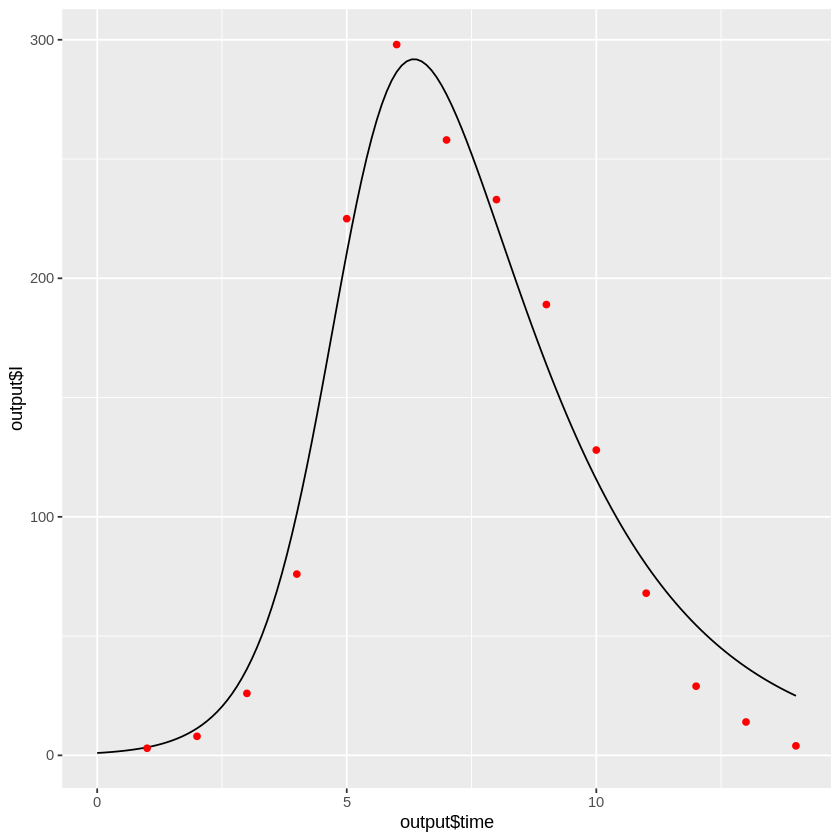

In [60]:
Initial_state_values <- c(S = 762, I = 1, R = 0)
    
    parameters<-optimised$par
    timestep<- seq(0,14,0.1)

output <- as.data.frame(ode(y = Initial_state_values, 
                            times = timestep, 
                            func = sir_model,
                            parms = parameters))
ggplot() +
  geom_line(data = output, aes(x = output$time, y = output$I)) +geom_point(data=flu_data,aes(x=flu_data$time,y=flu_data$I),color="red") 
                                                        
                               